# Scikit-learn 예제


In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [2]:
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)

In [3]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [4]:
predictions = model.predict(X_test)

# 같은 걸로 Spark ML 예시


In [5]:
from pyspark.sql import SparkSession
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler

In [6]:
spark = SparkSession.builder.appName("SparkML").getOrCreate()

In [10]:
data = spark.read.format("libsvm").load("/content/sample_data/sample_libsvm_data.txt")

In [11]:
lr = LogisticRegression()
model = lr.fit(data)

In [12]:
predictions = model.transform(data)
predictions.select("features","label", "prediction").show()

+--------------------+-----+----------+
|            features|label|prediction|
+--------------------+-----+----------+
|(692,[127,128,129...|  0.0|       0.0|
|(692,[158,159,160...|  1.0|       1.0|
|(692,[124,125,126...|  1.0|       1.0|
|(692,[152,153,154...|  1.0|       1.0|
|(692,[151,152,153...|  1.0|       1.0|
|(692,[129,130,131...|  0.0|       0.0|
|(692,[158,159,160...|  1.0|       1.0|
|(692,[99,100,101,...|  1.0|       1.0|
|(692,[154,155,156...|  0.0|       0.0|
|(692,[127,128,129...|  0.0|       0.0|
|(692,[154,155,156...|  1.0|       1.0|
|(692,[153,154,155...|  0.0|       0.0|
|(692,[151,152,153...|  0.0|       0.0|
|(692,[129,130,131...|  1.0|       1.0|
|(692,[154,155,156...|  0.0|       0.0|
|(692,[150,151,152...|  1.0|       1.0|
|(692,[124,125,126...|  0.0|       0.0|
|(692,[152,153,154...|  0.0|       0.0|
|(692,[97,98,99,12...|  1.0|       1.0|
|(692,[124,125,126...|  1.0|       1.0|
+--------------------+-----+----------+
only showing top 20 rows



In [13]:
!pip install matplotlib pyspark numpy

In [18]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False


<ipython-input-19-1b24e11d23d2>:43: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-1b24e11d23d2>:43: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-1b24e11d23d2>:43: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-1b24e11d23d2>:43: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-1b24e11d23d2>:43: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-1b24e11d23d2>:43: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-1b24e11d23d2>:43: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-i

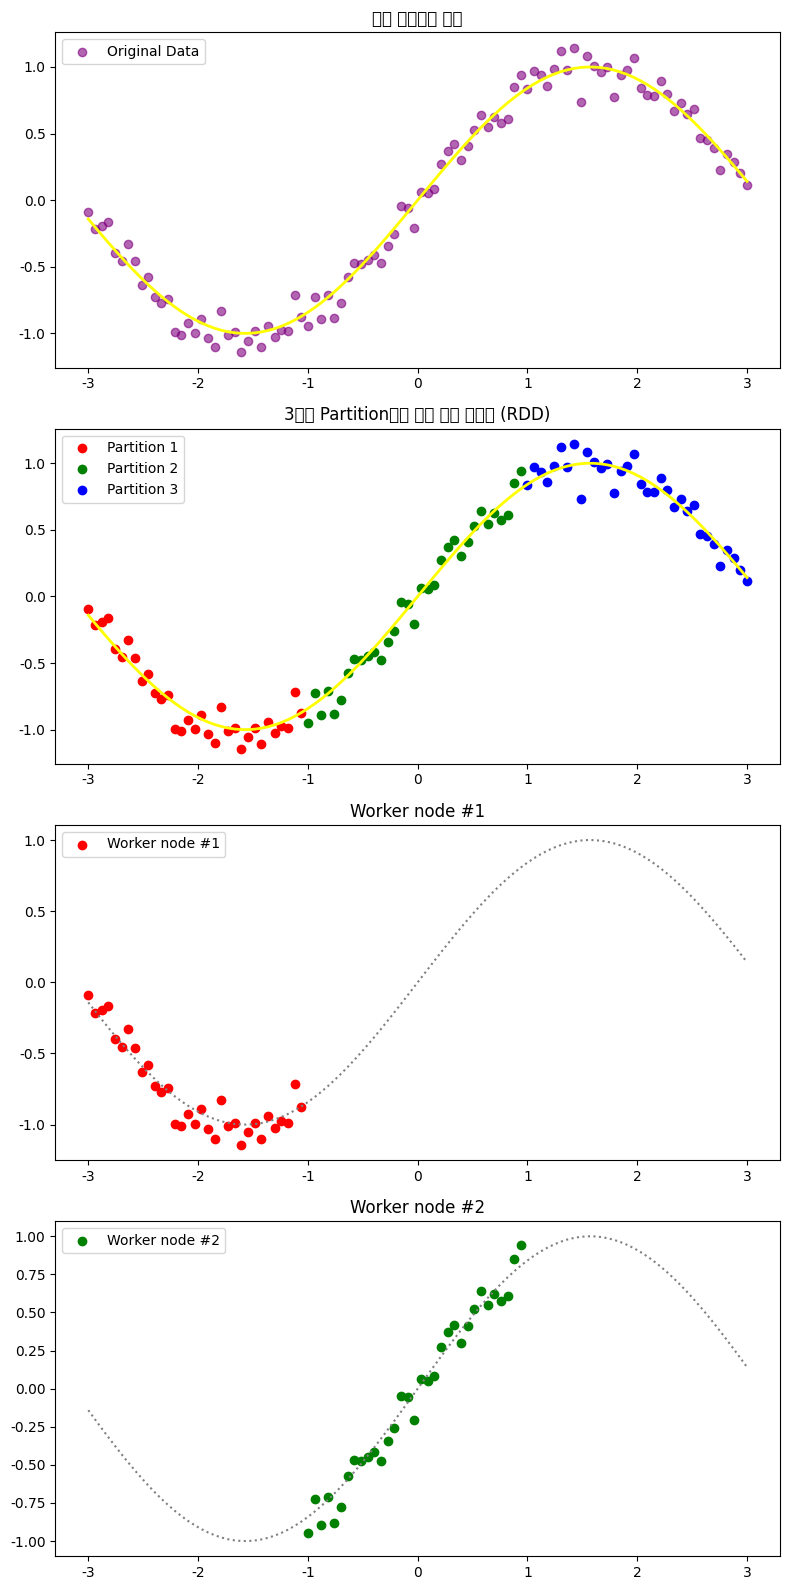

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark import SparkContext

spark = SparkSession.builder.appName("RDD_Visualization").getOrCreate()
sc = spark.sparkContext

np.random.seed(42)
X = np.linspace(-3, 3, 100)
y = np.sin(X) + np.random.normal(scale=0.1, size=X.shape)

data = list(zip(X, y))
rdd = sc.parallelize(data, numSlices=3)

colors = ['red', 'green', 'blue']
partitioned_data = rdd.glom().collect()

fig, axes = plt.subplots(4, 1, figsize=(8, 16))

axes[0].scatter(X, y, color='purple', alpha=0.6, label="Original Data")
axes[0].plot(X, np.sin(X), color='yellow', linewidth=2)
axes[0].set_title("원본 데이터의 모습")
axes[0].legend()

axes[1].set_title("3개의 Partition으로 나눈 원본 데이터 (RDD)")
for i, partition in enumerate(partitioned_data):
    x_p, y_p = zip(*partition)
    axes[1].scatter(x_p, y_p, color=colors[i], label=f"Partition {i+1}")
axes[1].plot(X, np.sin(X), color='yellow', linewidth=2)
axes[1].legend()

for i, partition in enumerate(partitioned_data):
    x_p, y_p = zip(*partition)
    if i + 2 < len(axes):
        axes[i + 2].scatter(x_p, y_p, color=colors[i], label=f"Worker node #{i+1}")
        axes[i + 2].plot(X, np.sin(X), color='gray', linestyle="dotted")
        axes[i + 2].set_title(f"Worker node #{i+1}")
        axes[i + 2].legend()
    else:
        break

plt.tight_layout()
plt.show()